<a href="https://colab.research.google.com/github/soleildayana/Planetary-Sciences/blob/main/PREM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libreria
import pandas as pd


## PREM

Calcule y grafique los perfiles de densidad, masa, aceleración gravitacional, presión y temperatura, en
función del radio, para un planeta tipo terrestre, de cuatro capas: un núcleo sólido interno, un núcleo
líquido externo, un manto y una corteza, con las mismas características que el planeta Tierra.

In [ ]:
premcsv = pd.read_csv('PREM500.csv')
premcsv.head()

,0.,13088.50,11262.20,3667.80,100000.0,104.0,11262.20.1,3667.80.1,1.00000
0,12858.0,13088.46,11262.17,3667.78,100000.0,104.0,11262.17,3667.78,1.0
1,25716.0,13088.36,11262.10,3667.73,100000.0,104.0,11262.10,3667.73,1.0
2,38574.0,13088.18,11261.97,3667.64,100000.0,104.0,11261.97,3667.64,1.0
3,51432.0,13087.92,11261.79,3667.51,100000.0,104.0,11261.79,3667.51,1.0
4,64289.0,13087.60,11261.55,3667.35,100000.0,104.0,11261.55,3667.35,1.0


Graficar los perfiles de densidad, masa y presión de un planeta integrando las siguientes ecuaciones diferenciales:

\begin{equation}
     \frac{dg}{dr} = 4 \pi G \rho(r) - \frac{2Gm(r)}{r^3}
 \end{equation}

 \begin{equation}
     \frac{dm}{dr} = 4 \pi r^2 \rho (r)
 \end{equation}

\begin{equation}
    \frac{dP}{dr} = -g(r) \rho(r)
\end{equation}

In [ ]:
G = 6.674e-11

In [ ]:
import numpy as np

def system_of_equations(r, y):
    """
    Represents the system of differential equations for a planetary model.

    Args:
        r: The radius (independent variable).
        y: A list containing [mass, gravity, pressure].

    Returns:
        A list containing the derivatives [dm/dr, dg/dr, dP/dr].
    """
    m, g, P = y


    rho = np.interp(r, premcsv.iloc[:, 0], premcsv.iloc[:, 1])

    # Define the differential equations
    dm_dr = 4 * np.pi * r**2 * rho
    dg_dr = 4 * np.pi * G * rho - (2 * G * m) / (r**3 + 1e-9) # Add a small epsilon to avoid division by zero at r=0
    dP_dr = -g * rho

    return [dm_dr, dg_dr, dP_dr]

In [ ]:
r_initial = 1e3  # 1 km
m_initial = 0
g_initial = 0
P_initial = 3.6e11
y_initial = [m_initial, g_initial, P_initial]

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np

# Define the integration range
r_final = premcsv.iloc[-1, 0]
r_span = [r_initial, r_final]

# Create a new array of radius values for evaluation
r_eval = np.linspace(r_initial, r_final, 500)

# Solve the system of differential equations
solution = solve_ivp(system_of_equations, r_span, y_initial, method='RK45', dense_output=True, t_eval=r_eval)

# Extract the solutions
r_sol = solution.t
m_sol, g_sol, P_sol = solution.y

In [ ]:
# Depurando
print(f"Masa total: {m_sol[-1]:.2e} kg")
print(f"Gravedad superficial: {g_sol[-1]:.2f} m/s^2")
print(f"Presión central: {P_sol[0]:.2e} Pa")


Masa total: 5.96e+24 kg
Gravedad superficial: 9.78 m/s^2
Presión central: 3.60e+11 Pa


In [ ]:
# Perfil de temperatura por capas (segmentado por radio)
def temperatura_por_capas(r):
    """
    Devuelve el perfil de temperatura en función del radio basado en una aproximación por capas.
    El resultado está en Kelvin.
    """
    # Radios de capa en metros
    radios_km = [0, 1221, 3480, 5701, 6371]
    radios_m = [r * 1e3 for r in radios_km]

    # Temperaturas correspondientes en cada capa (en Kelvin)
    temperaturas_K = [6000, 5000, 4000, 2000, 300]

    # Interpolación lineal
    T = np.interp(r, radios_m, temperaturas_K)

    return T


/tmp/ipython-input-2434054103.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('inferno', 4)


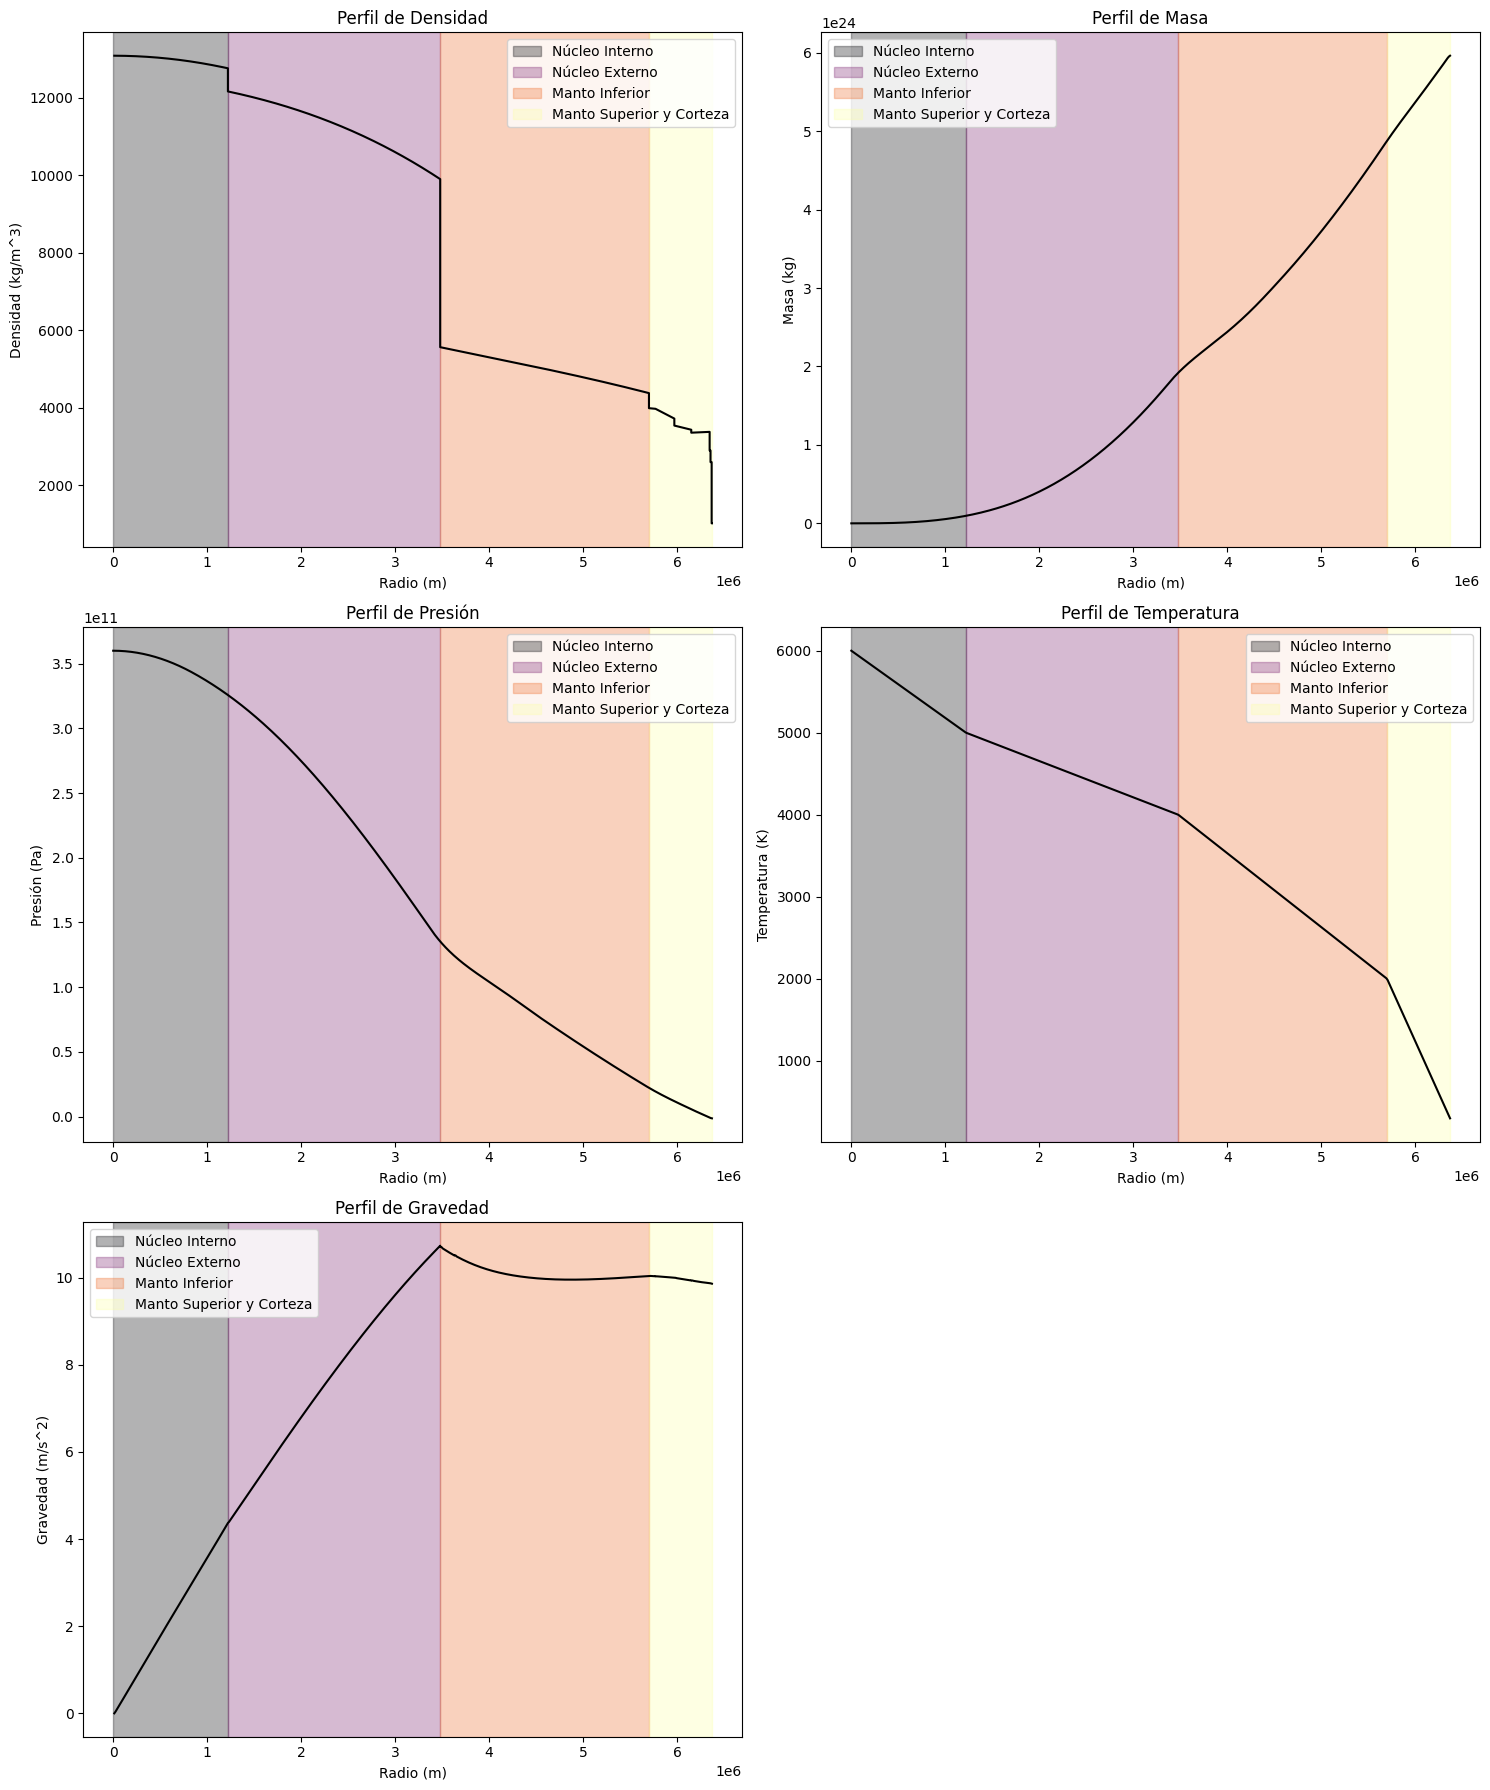

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Calculate temperature profile
T_sol = temperatura_por_capas(r_sol)

fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# Get colors from the 'inferno' colormap
colors = cm.get_cmap('inferno', 4)

# Density vs. Radius
axs[0, 0].plot(premcsv.iloc[:, 0], premcsv.iloc[:, 1], color = 'black')
axs[0, 0].set_title('Perfil de Densidad')
axs[0, 0].set_xlabel('Radio (m)')
axs[0, 0].set_ylabel('Densidad (kg/m^3)')
axs[0, 0].axvspan(0, 1221500, color=colors(0), alpha = 0.3, label='Núcleo Interno')
axs[0, 0].axvspan(1221500, 3480000, color=colors(1), alpha = 0.3, label='Núcleo Externo')
axs[0, 0].axvspan(3480000, 5701000, color=colors(2), alpha = 0.3, label='Manto Inferior')
axs[0, 0].axvspan(5701000, 6371000, color=colors(3), alpha = 0.3, label='Manto Superior y Corteza')
axs[0, 0].legend()

# Mass vs. Radius
axs[0, 1].plot(r_sol, m_sol, color = 'black')
axs[0, 1].set_title('Perfil de Masa')
axs[0, 1].set_xlabel('Radio (m)')
axs[0, 1].set_ylabel('Masa (kg)')
axs[0, 1].axvspan(0, 1221500, color=colors(0), alpha = 0.3, label='Núcleo Interno')
axs[0, 1].axvspan(1221500, 3480000, color=colors(1), alpha = 0.3, label='Núcleo Externo')
axs[0, 1].axvspan(3480000, 5701000, color=colors(2), alpha = 0.3, label='Manto Inferior')
axs[0, 1].axvspan(5701000, 6371000, color=colors(3), alpha = 0.3, label='Manto Superior y Corteza')
axs[0, 1].legend()

# Pressure vs. Radius
axs[1, 0].plot(r_sol, P_sol, color = 'black')
axs[1, 0].set_title('Perfil de Presión')
axs[1, 0].set_xlabel('Radio (m)')
axs[1, 0].set_ylabel('Presión (Pa)')
axs[1, 0].axvspan(0, 1221500, color=colors(0), alpha = 0.3, label='Núcleo Interno')
axs[1, 0].axvspan(1221500, 3480000, color=colors(1), alpha = 0.3, label='Núcleo Externo')
axs[1, 0].axvspan(3480000, 5701000, color=colors(2), alpha = 0.3, label='Manto Inferior')
axs[1, 0].axvspan(5701000, 6371000, color=colors(3), alpha = 0.3, label='Manto Superior y Corteza')
axs[1, 0].legend()

# Temperature vs. Radius
axs[1, 1].plot(r_sol, T_sol, color = 'black')
axs[1, 1].set_title('Perfil de Temperatura')
axs[1, 1].set_xlabel('Radio (m)')
axs[1, 1].set_ylabel('Temperatura (K)')
axs[1, 1].axvspan(0, 1221500, color=colors(0), alpha = 0.3, label='Núcleo Interno')
axs[1, 1].axvspan(1221500, 3480000, color=colors(1), alpha = 0.3, label='Núcleo Externo')
axs[1, 1].axvspan(3480000, 5701000, color=colors(2), alpha = 0.3, label='Manto Inferior')
axs[1, 1].axvspan(5701000, 6371000, color=colors(3), alpha = 0.3, label='Manto Superior y Corteza')
axs[1, 1].legend()

# Gravity vs. Radius
axs[2, 0].plot(radios, grav, color = 'black')
axs[2, 0].set_title('Perfil de Gravedad')
axs[2, 0].set_xlabel('Radio (m)')
axs[2, 0].set_ylabel('Gravedad (m/s^2)')
axs[2, 0].axvspan(0, 1221500, color=colors(0), alpha = 0.3, label='Núcleo Interno')
axs[2, 0].axvspan(1221500, 3480000, color=colors(1), alpha = 0.3, label='Núcleo Externo')
axs[2, 0].axvspan(3480000, 5701000, color=colors(2), alpha = 0.3, label='Manto Inferior')
axs[2, 0].axvspan(5701000, 6371000, color=colors(3), alpha = 0.3, label='Manto Superior y Corteza')
axs[2, 0].legend()

# Hide the empty subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()

/tmp/ipython-input-1528294288.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('inferno', 4)


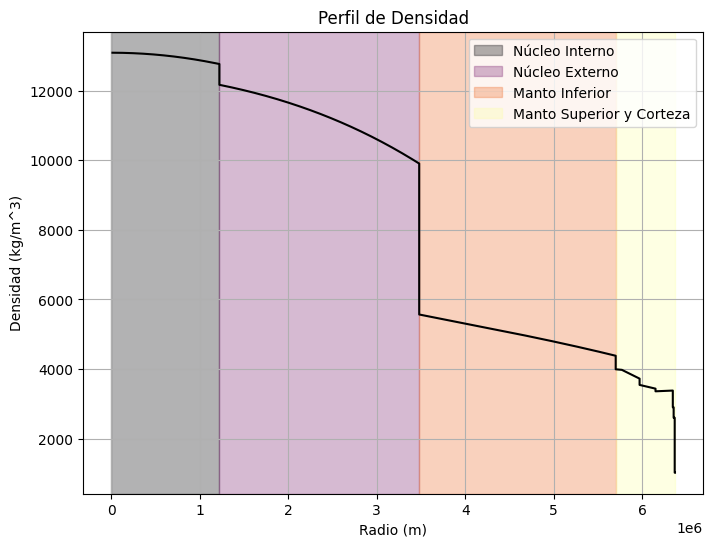

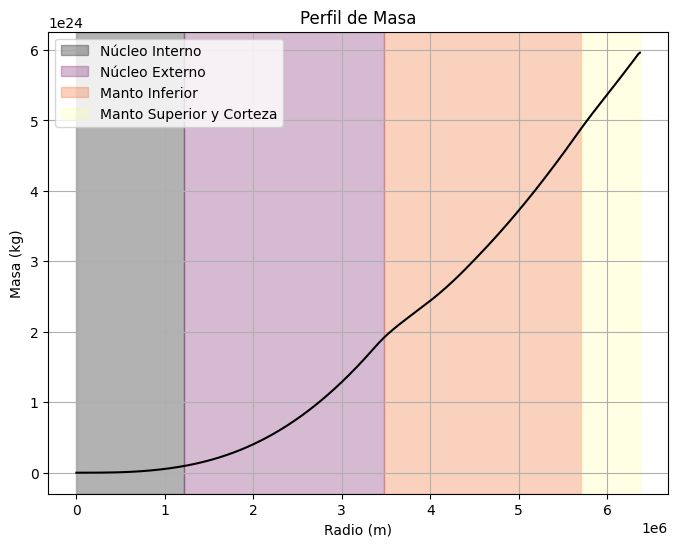

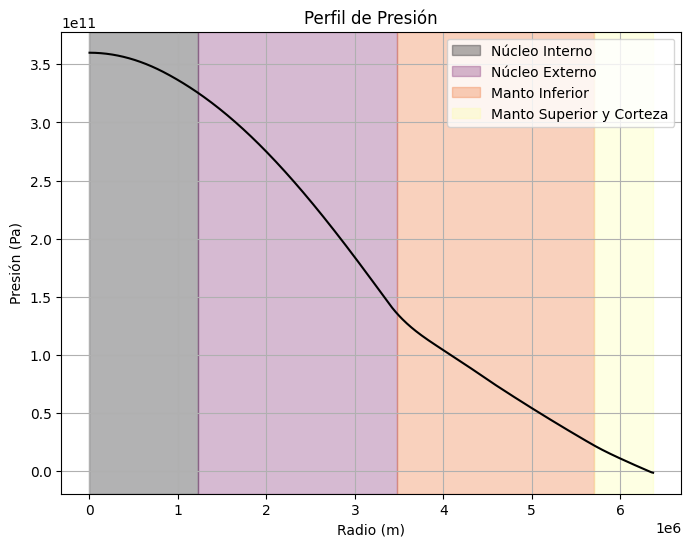

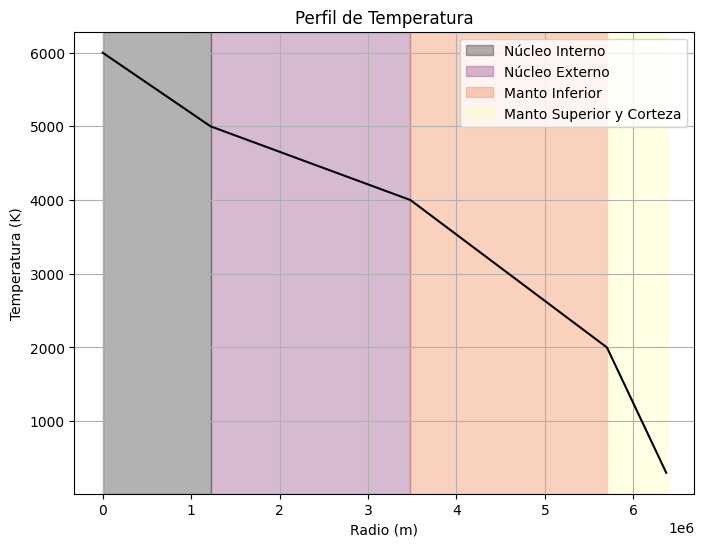

/tmp/ipython-input-1528294288.py:72: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w--" (-> color='w'). The keyword argument will take precedence.
  plt.plot(radios,grav_mean, 'w--', label=r'$g$=9.8', color = 'red')


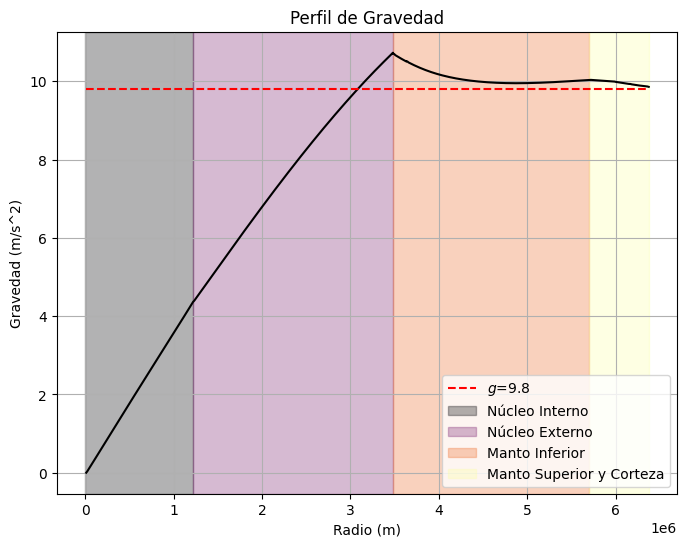

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Get colors from the 'inferno' colormap
colors = cm.get_cmap('inferno', 4)

# --- Density Plot ---
plt.figure(figsize=(8, 6))
plt.plot(premcsv.iloc[:, 0], premcsv.iloc[:, 1], color = 'black')
plt.title('Perfil de Densidad')
plt.xlabel('Radio (m)')
plt.ylabel('Densidad (kg/m^3)')
plt.axvspan(0, 1221500, color=colors(0), alpha=0.3, label='Núcleo Interno')
plt.axvspan(1221500, 3480000, color=colors(1), alpha=0.3, label='Núcleo Externo')
plt.axvspan(3480000, 5701000, color=colors(2), alpha=0.3, label='Manto Inferior')
plt.axvspan(5701000, 6371000, color=colors(3), alpha=0.3, label='Manto Superior y Corteza')
plt.legend()
plt.grid(True)
plt.show()

# --- Mass Plot ---
plt.figure(figsize=(8, 6))
plt.plot(r_sol, m_sol, color = 'black')
plt.title('Perfil de Masa')
plt.xlabel('Radio (m)')
plt.ylabel('Masa (kg)')
plt.axvspan(0, 1221500, color=colors(0), alpha=0.3, label='Núcleo Interno')
plt.axvspan(1221500, 3480000, color=colors(1), alpha=0.3, label='Núcleo Externo')
plt.axvspan(3480000, 5701000, color=colors(2), alpha=0.3, label='Manto Inferior')
plt.axvspan(5701000, 6371000, color=colors(3), alpha=0.3, label='Manto Superior y Corteza')
plt.legend()
plt.grid(True)
plt.show()

# --- Pressure Plot ---
plt.figure(figsize=(8, 6))
plt.plot(r_sol, P_sol, color = 'black')
plt.title('Perfil de Presión')
plt.xlabel('Radio (m)')
plt.ylabel('Presión (Pa)')
plt.axvspan(0, 1221500, color=colors(0), alpha=0.3, label='Núcleo Interno')
plt.axvspan(1221500, 3480000, color=colors(1), alpha=0.3, label='Núcleo Externo')
plt.axvspan(3480000, 5701000, color=colors(2), alpha=0.3, label='Manto Inferior')
plt.axvspan(5701000, 6371000, color=colors(3), alpha=0.3, label='Manto Superior y Corteza')
plt.legend()
plt.grid(True)
plt.show()

# --- Temperature Plot ---
plt.figure(figsize=(8, 6))
T_sol = temperatura_por_capas(r_sol)
plt.plot(r_sol, T_sol, color = 'black')
plt.title('Perfil de Temperatura')
plt.xlabel('Radio (m)')
plt.ylabel('Temperatura (K)')
plt.axvspan(0, 1221500, color=colors(0), alpha=0.3, label='Núcleo Interno')
plt.axvspan(1221500, 3480000, color=colors(1), alpha=0.3, label='Núcleo Externo')
plt.axvspan(3480000, 5701000, color=colors(2), alpha=0.3, label='Manto Inferior')
plt.axvspan(5701000, 6371000, color=colors(3), alpha=0.3, label='Manto Superior y Corteza')
plt.legend()
plt.grid(True)
plt.show()

grav_mean = np.zeros_like(radios, dtype=np.float64) + 9.8
# --- Gravity Plot ---
plt.figure(figsize=(8, 6))
plt.plot(radios, grav, color = 'black')
plt.title('Perfil de Gravedad')
plt.xlabel('Radio (m)')
plt.ylabel('Gravedad (m/s^2)')
plt.plot(radios,grav_mean, 'w--', label=r'$g$=9.8', color = 'red')
plt.axvspan(0, 1221500, color=colors(0), alpha=0.3, label='Núcleo Interno')
plt.axvspan(1221500, 3480000, color=colors(1), alpha=0.3, label='Núcleo Externo')
plt.axvspan(3480000, 5701000, color=colors(2), alpha=0.3, label='Manto Inferior')
plt.axvspan(5701000, 6371000, color=colors(3), alpha=0.3, label='Manto Superior y Corteza')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-3149997269.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('inferno', 4)


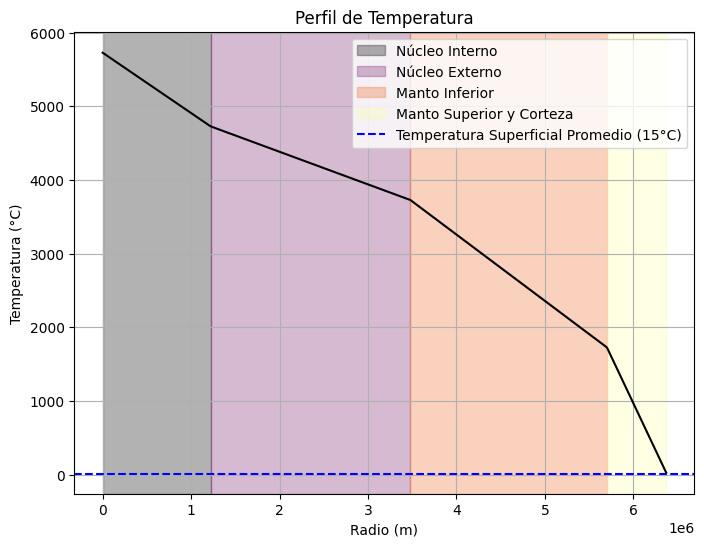

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Get colors from the 'inferno' colormap
colors = cm.get_cmap('inferno', 4)

# --- Temperature Plot ---
plt.figure(figsize=(8, 6))
T_sol_C = temperatura_por_capas(r_sol) - 273.15
plt.plot(r_sol, T_sol_C, color = 'black')
plt.title('Perfil de Temperatura')
plt.xlabel('Radio (m)')
plt.ylabel('Temperatura (°C)')
plt.axvspan(0, 1221500, color=colors(0), alpha=0.3, label='Núcleo Interno')
plt.axvspan(1221500, 3480000, color=colors(1), alpha=0.3, label='Núcleo Externo')
plt.axvspan(3480000, 5701000, color=colors(2), alpha=0.3, label='Manto Inferior')
plt.axvspan(5701000, 6371000, color=colors(3), alpha=0.3, label='Manto Superior y Corteza')
plt.axhline(y=15, color='b', linestyle='--', label='Temperatura Superficial Promedio (15°C)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

def calculate_Rs(mu_0, f_0, M, m, n, v, k_B, T):
  """
  Calcula el radio de la magnetopausa (R_s) según la fórmula proporcionada.

  Args:
    mu_0: Permeabilidad del vacío.
    f_0: Factor de forma.
    M: Momento dipolar magnético.
    m: Masa de las partículas del viento solar.
    n: Densidad numérica de las partículas del viento solar.
    v: Velocidad del viento solar.
    k_B: Constante de Boltzmann.
    T: Temperatura del viento solar.

  Returns:
    El valor de R_s.
  """
  numerator = mu_0 * f_0**2 * M**2
  denominator = 8 * np.pi**2 * (m * n * v**2 + 2 * n * k_B * T)
  return (numerator / denominator)**(1/6)

In [ ]:
# Constantes
mu_0 = 4 * np.pi * 1e-7          # [H/m] permeabilidad del vacío
f_0 = 1.3                        # factor de forma promedio
m_p = 1.6726e-27                # [kg] masa del protón (suponiendo viento solar de protones)
k_B = 1.380649e-23              # [J/K] constante de Boltzmann
n = 5e6                         # [m^-3] densidad típica del viento solar
v = 400e3                       # [m/s] velocidad promedio del viento solar
T = 1.5e5                       # [K] temperatura típica del viento solar

# Momentos magnéticos aproximados para planetas gaseosos [A m^2] y radios planetarios [m]
# Referencia: "Planetary Magnetism" (2010), M. Kivelson & C. Russell, y datos de NASA Planetary Data System
momentos_magneticos = {
    "Júpiter":  (1.56e27, 7.14e7, 5.2),
    "Saturno":  (4.6e25, 6.03e7, 9.5),
    "Urano":    (3.9e24, 2.54e7, 19.2),
    "Neptuno":  (2.2e24, 2.46e7, 30.1)
}

# Cálculo de R_s para cada planeta gaseoso
print("\nCálculo de R_s para cada planeta gaseoso:\n")
for planeta, (M, R_planeta, a) in momentos_magneticos.items():
    n_planeta = 5e6 / a**2  # Densidad ajustada por ley ~1/a^2
    Rs = calculate_Rs(mu_0, f_0, M, m_p, n_planeta, v, k_B, T)
    Rs_normalizado = Rs / R_planeta
    print(f"{planeta}:\n  R_s = {Rs:.2e} m\n  R_s / R_{planeta} = {Rs_normalizado:.2f} radios planetarios\n")



Cálculo de R_s para cada planeta gaseoso:

Júpiter:
  R_s = 3.30e+09 m
  R_s / R_Júpiter = 46.28 radios planetarios

Saturno:
  R_s = 1.25e+09 m
  R_s / R_Saturno = 20.70 radios planetarios

Urano:
  R_s = 6.93e+08 m
  R_s / R_Urano = 27.29 radios planetarios

Neptuno:
  R_s = 6.65e+08 m
  R_s / R_Neptuno = 27.05 radios planetarios




Cálculo de R_s para cada planeta gaseoso:

Júpiter:
  R_s = 3.30e+09 m
  R_s / R_Júpiter = 46.28 radios planetarios

Saturno:
  R_s = 1.25e+09 m
  R_s / R_Saturno = 20.70 radios planetarios

Urano:
  R_s = 6.93e+08 m
  R_s / R_Urano = 27.29 radios planetarios

Neptuno:
  R_s = 6.65e+08 m
  R_s / R_Neptuno = 27.05 radios planetarios



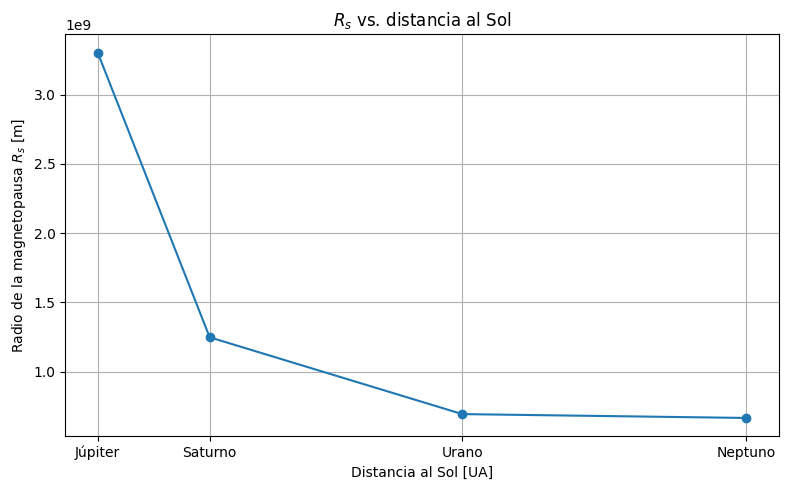

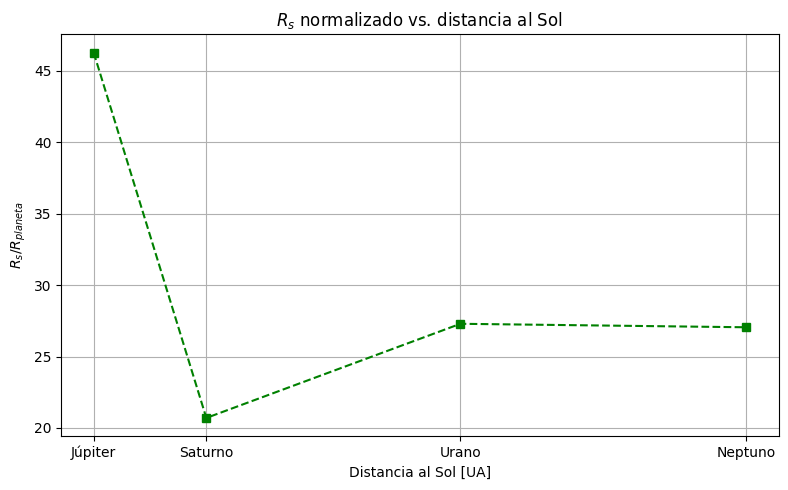

In [ ]:
# Cálculo de R_s para cada planeta gaseoso
print("\nCálculo de R_s para cada planeta gaseoso:\n")

nombres = []
Rs_metros = []
Rs_normalizados = []
a_vals = []

for planeta, (M, R_planeta, a) in momentos_magneticos.items():
    n_planeta = 5e6 / a**2  # Densidad ajustada por ley ~1/a^2
    Rs = calculate_Rs(mu_0, f_0, M, m_p, n_planeta, v, k_B, T)
    Rs_normalizado = Rs / R_planeta
    print(f"{planeta}:\n  R_s = {Rs:.2e} m\n  R_s / R_{planeta} = {Rs_normalizado:.2f} radios planetarios\n")
    nombres.append(planeta)
    Rs_metros.append(Rs)
    Rs_normalizados.append(Rs_normalizado)
    a_vals.append(a)

# Gráfico: Rs en metros vs. distancia
plt.figure(figsize=(8,5))
plt.plot(a_vals, Rs_metros, 'o-', label="$R_s$ [m]")
plt.xlabel("Distancia al Sol [UA]")
plt.ylabel("Radio de la magnetopausa $R_s$ [m]")
plt.title("$R_s$ vs. distancia al Sol")
plt.grid(True)
plt.xticks(a_vals, nombres)
plt.tight_layout()
plt.show()

# Gráfico: Rs normalizado vs. distancia
plt.figure(figsize=(8,5))
plt.plot(a_vals, Rs_normalizados, 's--', color='green', label="$R_s / R_{planeta}$")
plt.xlabel("Distancia al Sol [UA]")
plt.ylabel("$R_s / R_{planeta}$")
plt.title("$R_s$ normalizado vs. distancia al Sol")
plt.grid(True)
plt.xticks(a_vals, nombres)
plt.tight_layout()
plt.show()
